In [7]:
import pandas as pd
import numpy as np

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

Explanation : 

   Joining the dataframe together creating a result in sqlite
   importing results from database created
   Data Visualization Part: Check in Database section

In [8]:
Bike_stations = pd.read_csv('C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Statistical-Modelling-with-Python\\Bike_stations.csv', delimiter =',')

In [9]:
# renaming lattitude and longitude column to avoid confusion with restaurant data
Bike_stations = Bike_stations.rename(columns={'Latitude': 'station_lat',
                                              'Longitude': 'station_lon'})

In [10]:
Bike_stations

,Station Name,station_lat,station_lon,Bikes Available
0,Queen St E / Woodward Ave,43.665269,-79.319796,15
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,0
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,16
3,Bond St / Queen St E,43.653236,-79.376716,1
4,Church St / Alexander St,43.663722,-79.380288,7
...,...,...,...,...
701,Victoria Park Ave / Edge Park Ave,43.717679,-79.299616,1
702,Galbraith Rd / King's College Rd,43.660387,-79.395378,0
703,Exhibition GO Station,43.635201,-79.418771,4
704,Princes Gate / Nunavut Dr,43.633352,-79.414363,7


In [11]:
indian_restaurant = pd.read_csv('C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Statistical-Modelling-with-Python\\indian_restaurant.csv', delimiter =',')

In [12]:
#renaming latitude and longitude column to avoid confusion with bike_station data
indian_restaurant = indian_restaurant.rename(columns={'Latitude': 'restaurant_lat',
                                              'Longitude': 'restaurant_lon'})

In [13]:
indian_restaurant

,restaurant_lat,restaurant_lon,name,distance,address,telephone,rating,open_true
0,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.6,True
1,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,7.6,True
2,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,True
3,43.672004,-79.322433,Regency Restaurant Inc,790,"1423 Gerrard St E (Hiawatha St), Toronto ON M4...",(416) 778-7366,6.2,True
4,43.666400,-79.316826,Butter Chicken Roti,255,"1610 Queen St E (Coxwel), Toronto ON M4L 1G2",(647) 349-7684,NaN,True
...,...,...,...,...,...,...,...,...
3267,43.641873,-79.411437,My Roti Place,982,"901 King St W (at Strachan Ave), Toronto ON M5...",(647) 295-9446,NaN,True
3268,43.638479,-79.417204,Brazen Head Irish Pub,617,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.1,True
3269,43.641873,-79.411437,My Roti Place,622,"901 King St W (at Strachan Ave), Toronto ON M5...",(647) 295-9446,NaN,True
3270,43.638768,-79.416315,Maurya East Indian Cuisine - Liberty Village,655,"150 E Liberty St, Toronto ON M6K 3R5",(647) 347-7002,NaN,True


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [14]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [15]:
# creating our database into project file
connection = create_connection("C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Statistical-Modelling-Project\\api.db")

Connection to SQLite DB successful


In [20]:
# insert data from Bike_station dataframe
Bike_stations.to_sql('Bike_stations', connection, if_exists='replace', index=False)

706

In [21]:
# insert data from indian_restaurant dataframe
indian_restaurant.to_sql('indian_restaurant', connection, if_exists='replace',index=False)

3272

In [22]:
# commit changes
connection.commit()

In [17]:
# create a cursor object to execute SQL queries
cursor = connection.cursor()

In [23]:
# Perform a spatial join between the two tables using a SQL query
query = """
    SELECT bs.*, ir.*
    FROM Bike_stations AS bs
    JOIN indian_restaurant AS ir
    ON (
        ((ir.restaurant_lat - bs.station_lat) * (ir.restaurant_lat - bs.station_lat) +
        (ir.restaurant_lon - bs.station_lon) * (ir.restaurant_lon - bs.station_lon)) <= (1.0 / 111.32) * (1.0 / 111.32)  -- 1km radius
    )
"""


In [24]:
# execute the query
cursor.execute(query)

In [25]:
# fetch the result
result = cursor.fetchall()

In [26]:
# create a dataframe from the result
result_df = pd.DataFrame(result, columns=[column[0] for column in cursor.description])

In [27]:
result_df

,Station Name,station_lat,station_lon,Bikes Available,restaurant_lat,restaurant_lon,name,distance,address,telephone,rating,open_true
0,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.6,1
1,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,7.6,1
2,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,1
3,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.672004,-79.322433,Regency Restaurant Inc,790,"1423 Gerrard St E (Hiawatha St), Toronto ON M4...",(416) 778-7366,6.2,1
4,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.666400,-79.316826,Butter Chicken Roti,255,"1610 Queen St E (Coxwel), Toronto ON M4L 1G2",(647) 349-7684,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104081,800 Fleet St,43.636804,-79.408832,26,43.641873,-79.411437,My Roti Place,982,"901 King St W (at Strachan Ave), Toronto ON M5...",(647) 295-9446,NaN,1
104082,800 Fleet St,43.636804,-79.408832,26,43.638479,-79.417204,Brazen Head Irish Pub,617,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.1,1
104083,800 Fleet St,43.636804,-79.408832,26,43.641873,-79.411437,My Roti Place,622,"901 King St W (at Strachan Ave), Toronto ON M5...",(647) 295-9446,NaN,1
104084,800 Fleet St,43.636804,-79.408832,26,43.638768,-79.416315,Maurya East Indian Cuisine - Liberty Village,655,"150 E Liberty St, Toronto ON M6K 3R5",(647) 347-7002,NaN,1


In [28]:
#inserting the data back into database
result_df.to_sql('Result', connection, if_exists='replace', index=False)

104086

In [40]:
# close the database connection
connection.close()

Visualize Data

In [29]:
result_df.shape

(104086, 12)

In [30]:
result_df.duplicated().sum()

2290

In [31]:
# there are 2290 diplicated rows in result df and shape is quite large so we will drop duplicated values
result_df = result_df.drop_duplicates()

In [32]:
result_df.shape

(101796, 12)

In [33]:
result_df.describe()

,station_lat,station_lon,Bikes Available,restaurant_lat,restaurant_lon,distance,rating,open_true
count,101796.000000,101796.000000,101796.000000,101796.000000,101796.000000,101796.000000,67394.000000,101796.0
mean,43.655767,-79.387236,7.462906,43.655843,-79.387116,635.015610,7.229230,1.0
std,0.012057,0.018531,7.620696,0.011733,0.018320,251.357971,0.856662,0.0
min,43.612063,-79.510392,0.000000,43.613296,-79.514191,5.000000,5.300000,1.0
25%,43.646925,-79.393899,1.000000,43.647934,-79.391728,448.000000,6.600000,1.0
50%,43.653500,-79.385911,5.000000,43.654287,-79.385750,667.000000,7.400000,1.0
75%,43.662862,-79.379625,12.000000,43.664459,-79.380255,848.000000,7.800000,1.0
max,43.776490,-79.209707,52.000000,43.773907,-79.209898,6296.000000,9.000000,1.0


In [5]:
import matplotlib.pyplot as plt

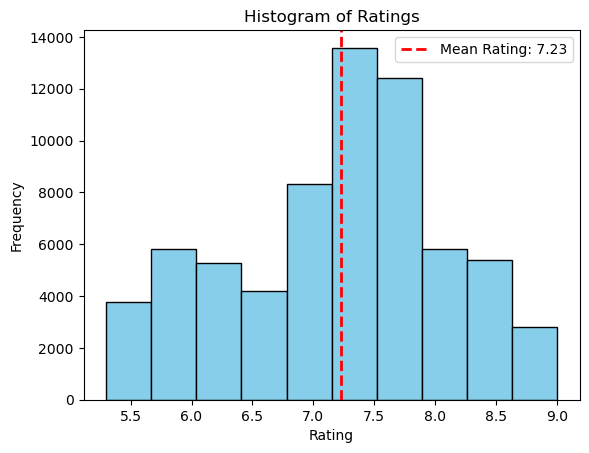

In [37]:
# create histogram of rating column
plt.hist(result_df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# calculate and display the mean rating
mean_rating = result_df['rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth = 2, label=f"Mean Rating: {mean_rating:.2f}")
plt.legend()

plt.show()

In [34]:
result_df.isnull().sum()

Station Name           0
station_lat            0
station_lon            0
Bikes Available        0
restaurant_lat         0
restaurant_lon         0
name                   0
distance               0
address                0
telephone             16
rating             34402
open_true              0
dtype: int64

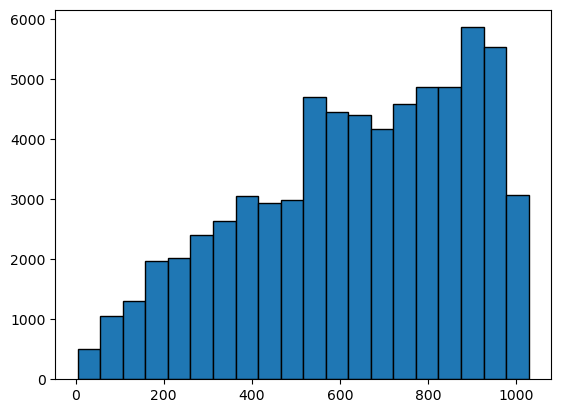

In [63]:
# create histogram of rating column
plt.hist(result_df['distance'], bins=20, edgecolor='k')

plt.show()

In [66]:
restaurant_counts = result_df['name'].value_counts()

In [67]:
restaurant_counts

Little India Restaurant                   3640
Joe's Buffet Palace                       3456
Colaba Junction                           3300
309 Dhaba Indian Excellence               2961
Aroma Fine Indian Cuisine                 2944
                                          ... 
Kamasutra Indian Restaurant & Wine Bar       9
Faley Restaurant                             6
Henry VIII Ale House                         4
Hakka Garden Chinese Restaurant              4
Iqbal Kebab & Sweet Centre                   2
Name: name, Length: 92, dtype: int64

In [35]:
# dropping rating rows with null values as replacing it with any other value is not feasable option as it could be misguiding the customers
result_df = result_df.dropna(subset=["rating"])

In [36]:
result_df.shape

(67394, 12)

##### Hypothesis Testing

(1) Null Hypothesis(H0): There is no significant difference in the mean rating of restaurants near bike stations and the mean rating of restaurants overall.

(2) Alternate Hyptothesis(H1): There is significant difference in the mean rating of restaurants near bike stations compared to the mean rating of restaurant overall

(3) conducting t-test to find the significance


In [52]:
# getting rating for each restaurant 
each_restaurant_rating = result_df[['name', 'rating']].drop_duplicates()

In [53]:
each_restaurant_rating

,name,rating
0,Udupi Palace,8.6
1,Motimahal Restaurant Ltd,7.6
2,Bombay Chowpatty,7.3
3,Regency Restaurant Inc,6.2
29,Lahore Tikka House,7.6
...,...,...
91565,Shaheen Tikka & Kabab House,7.6
91577,Faley Restaurant,6.7
91578,Bamiyan Kabob,8.4
91579,Iqbal Kebab & Sweet Centre,7.5


In [ ]:
# counting restaurants for each bike station
mean_rating_by_station = result_df.groupby('Station Name')['rating'].mean()

In [58]:
mean_rating_by_stations = pd.DataFrame(mean_rating_by_station)

In [59]:
mean_rating_by_stations

,rating
Station Name,
1 Market St - SMART,7.706452
11 Spadina Rd,7.574436
111 Bond St (North of Dundas St E) - SMART,6.829457
12 Harbour St,7.635714
135 Queens Wharf Rd - SMART,8.424719
...,...
York St / Harbour St (Love Park),7.468142
York St / Lake Shore Blvd W,7.468142
York St / Queens Quay W,7.518868


In [60]:
from scipy import stats

#Define the two groups (1: Ratings of restaurants near bike stations, 2: Ratings of all restaurants)
group1_ratings = each_restaurant_rating['rating']
group2_ratings = mean_rating_by_stations['rating']

# perform a two_sample t-test
t_stat, p_value = stats.ttest_ind(group1_ratings, group2_ratings, equal_var=False)

#check if the p-value is less than alpha (0.05)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ratings.")
    
else:
    print("Null Hypothesis True. There is no significant difference in mean ratings")

Null Hypothesis True. There is no significant difference in mean ratings


In [79]:
p_value

0.577629374723956

Finding correlation between Bikes Avaialble and distance to each Indian restaurant 

In [67]:
correlation_coefficient = result_df[['distance', 'Bikes Available']].corr().iloc[0,1]

In [68]:
correlation_coefficient

0.007596603467970456

Correlation coefficient is close to zero.
we can conclude:
    correlation is weak between bikes available and distance 

Look at the data before and after the join to validate your data.

In [74]:
Bike_stations

,Station Name,station_lat,station_lon,Bikes Available
0,Queen St E / Woodward Ave,43.665269,-79.319796,15
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,0
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,16
3,Bond St / Queen St E,43.653236,-79.376716,1
4,Church St / Alexander St,43.663722,-79.380288,7
...,...,...,...,...
701,Victoria Park Ave / Edge Park Ave,43.717679,-79.299616,1
702,Galbraith Rd / King's College Rd,43.660387,-79.395378,0
703,Exhibition GO Station,43.635201,-79.418771,4
704,Princes Gate / Nunavut Dr,43.633352,-79.414363,7


In [75]:
indian_restaurant

,restaurant_lat,restaurant_lon,name,distance,address,telephone,rating,open_true
0,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.6,True
1,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,7.6,True
2,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,True
3,43.672004,-79.322433,Regency Restaurant Inc,790,"1423 Gerrard St E (Hiawatha St), Toronto ON M4...",(416) 778-7366,6.2,True
4,43.666400,-79.316826,Butter Chicken Roti,255,"1610 Queen St E (Coxwel), Toronto ON M4L 1G2",(647) 349-7684,NaN,True
...,...,...,...,...,...,...,...,...
3267,43.641873,-79.411437,My Roti Place,982,"901 King St W (at Strachan Ave), Toronto ON M5...",(647) 295-9446,NaN,True
3268,43.638479,-79.417204,Brazen Head Irish Pub,617,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.1,True
3269,43.641873,-79.411437,My Roti Place,622,"901 King St W (at Strachan Ave), Toronto ON M5...",(647) 295-9446,NaN,True
3270,43.638768,-79.416315,Maurya East Indian Cuisine - Liberty Village,655,"150 E Liberty St, Toronto ON M6K 3R5",(647) 347-7002,NaN,True


In [76]:
result_df

,Station Name,station_lat,station_lon,Bikes Available,restaurant_lat,restaurant_lon,name,distance,address,telephone,rating,open_true
0,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.6,1
1,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,7.6,1
2,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,1
3,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.672004,-79.322433,Regency Restaurant Inc,790,"1423 Gerrard St E (Hiawatha St), Toronto ON M4...",(416) 778-7366,6.2,1
10,Queen St E / Woodward Ave,43.665269,-79.319796,15,43.672665,-79.321041,Udupi Palace,752,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104072,800 Fleet St,43.636804,-79.408832,26,43.638479,-79.417204,Brazen Head Irish Pub,716,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.1,1
104076,800 Fleet St,43.636804,-79.408832,26,43.638479,-79.417204,Brazen Head Irish Pub,815,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.1,1
104079,800 Fleet St,43.636804,-79.408832,26,43.638479,-79.417204,Brazen Head Irish Pub,395,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.1,1
104082,800 Fleet St,43.636804,-79.408832,26,43.638479,-79.417204,Brazen Head Irish Pub,617,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.1,1


In [80]:
# creating a csv file for result_df for further use
result_df.to_csv("C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Statistical-Modelling-with-Python\\Result.csv", index=False)